<a href="https://colab.research.google.com/github/Aditya218-maker/taxi-time-prediction/blob/main/TAXITIMEPREDICTIONPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

This project focuses on building a regression-based machine learning model to predict the trip duration of taxi rides in New York City. Leveraging the rich and publicly available NYC Taxi Trip dataset, the objective is to estimate how long a trip will take based on key features such as pickup and dropoff coordinates, date and time, passenger count, and travel distance.

Accurate trip duration predictions are crucial for enhancing route optimization, improving user experience in ride-hailing apps, and aiding in urban transportation planning. The project involves extensive data preprocessing, exploratory data analysis (EDA), feature engineering (e.g., calculating distances and extracting time-based features), and training various regression models including Linear Regression, Random Forest, and XGBoost. Evaluation metrics like RMSE and R² score are used to measure model performance.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Predict the duration of a taxi trip in New York City using features such as pickup and dropoff coordinates, time of day, passenger count, and more. Accurate trip time predictions can help optimize route planning, improve customer experience, and support logistics platforms.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [7]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/data/Copy of NYC Taxi Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

### Dataset First View

In [8]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [9]:
df.shape

(1458644, 11)

### Dataset Information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [13]:
df = df.drop_duplicates()

#### Missing Values/Null Values

In [14]:
df = df.dropna()
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### What did you know about your dataset?

The target variable is trip_duration.

All five trips have no null values  in these rows.

Trips seem realistic in terms of coordinates and durations.

All trips in your preview have store_and_fwd_flag = 'N', meaning they were transmitted in real-time.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

### Variables Description

In [ ]:
variable_descriptions = {
    'id': 'Unique identifier for each trip.',
    'vendor_id': 'Code for the taxi vendor',
    'pickup_datetime': 'Timestamp when the trip started.',
    'dropoff_datetime': 'Timestamp when the trip ended.',
    'passenger_count': 'Number of passengers in the taxi.',
    'pickup_longitude': 'Longitude where the trip began.',
    'pickup_latitude': 'Latitude where the trip began.',
    'dropoff_longitude': 'Longitude where the trip ended.',
    'dropoff_latitude': 'Latitude where the trip ended.',
    'store_and_fwd_flag': "Whether the trip data was stored and forwarded.",
    'trip_duration': 'Total trip duration in seconds (target variable).'
}
pd.DataFrame(variable_descriptions.items(), columns=['Variable', 'Description'])

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

### What all manipulations have you done and insights you found?

I have removed duplicates and remove rows with missing values(if any)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

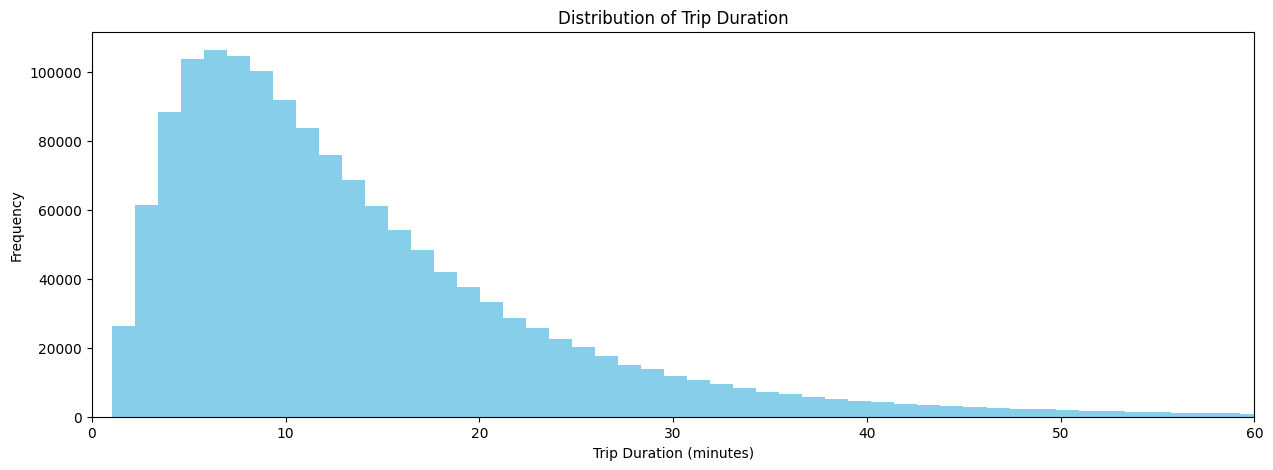

In [44]:
# Chart - 1 Distribution of trip duration (in minutes)
plt.figure(figsize=(15,5))
plt.hist(df['trip_duration'] / 60, bins=100, color='skyblue')
plt.xlim(0, 60)  # focusing on trips less than 60 minutes for clarity
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.show()

#####  What is/are the insight(s) found from the chart?

1.High concentration of short trips:

The histogram shows a very tall bar near the start (close to 0 on the x-axis), indicating that most trips are very short—possibly under 10 minutes.

This is typical in urban areas like NYC where many trips are quick hops between nearby locations.

2.Long tail distribution (right-skewed):

While we can't see the tail in this graph (due to xlim(0, 60)), the high peak on the left and rapid drop-off suggest a right-skewed distribution.

This means that fewer trips take longer durations, but some outliers likely exist beyond 60 minutes.

3.Overwhelming frequency:

The y-axis goes up to 1.4 million, so there are a large number of trips in this dataset.

The highest frequency bin likely includes trips between 0–5 minutes, highlighting the short-trip dominance.

4.Binning and clarity:

With bins=100 and xlim(0, 60), the chart provides good granular visibility for durations between 0 to 60 minutes.

Helps in identifying how the duration spreads within this focused range.

##### Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Optimizing Driver Allocation

Insight: Most trips are short (under 10–15 minutes).

Impact: Business can increase driver availability in zones with high short-trip density to reduce wait time and increase trip frequency per driver (higher revenue per hour).

2.Dynamic Pricing & Surge Strategy

Insight: There's a huge volume of short trips.

Impact: Implement micro-surge pricing for high-demand short trips (e.g., during rain or rush hours), optimizing revenue without deterring riders.

3.Trip Time Estimation for UX

Insight: Distribution helps understand typical trip lengths.

Impact: Improves ETA accuracy shown to users during booking—enhances trust and satisfaction, reducing app abandonment.

4.Customer Segmentation & Targeted Offers

Insight: Frequent short-trip users could be commuters or errand-goers.

Impact: Create targeted loyalty offers or pass plans (e.g., "10 short rides at ₹___") for such users to increase retention and repeat usage.



#### Chart - 2

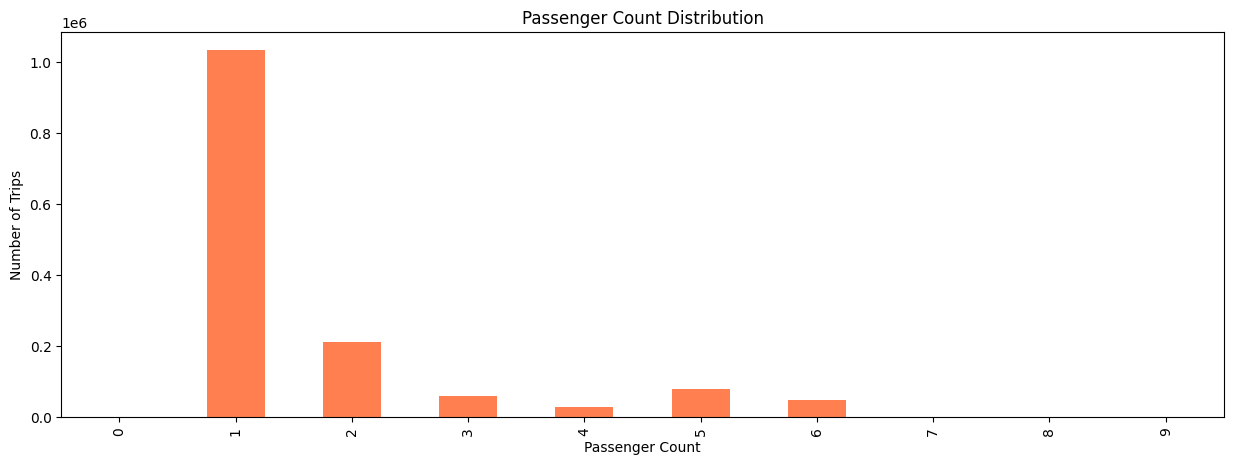

In [15]:
# Chart - 2  Passenger count distribution
plt.figure(figsize=(15,5))
df['passenger_count'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.title('Passenger Count Distribution')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.Solo trips dominate:

Trips with 1 passenger are by far the most frequent (~1 million+), suggesting most users travel alone (possibly work commutes, errands, or solo rideshare use).

2.Very few group rides:

Counts drop significantly after 2 passengers.

Passenger counts >5 are rare and could be outliers or data entry errors.

3.Potential data quality issue:

Passenger counts like 0 or >6 may be invalid and need cleaning before modeling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Targeted marketing

Focus promotions or ride-pooling incentives for solo and duo riders.

2.Fleet planning

Optimize for smaller vehicles since group rides are uncommon.

3.Data cleaning

Drop or correct unrealistic values (e.g., 0 or 9 passengers).



#### Chart - 3

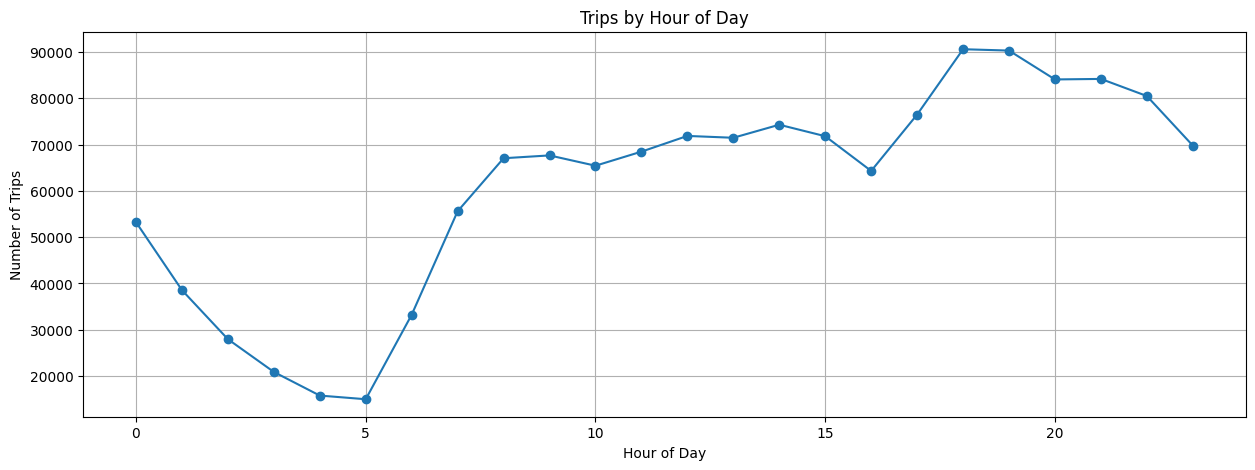

In [16]:
# Chart - 3 Trips over time (by hour of day)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
trips_by_hour = df.groupby('pickup_hour').size()
plt.figure(figsize=(15,5))
trips_by_hour.plot(kind='line', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour of Day')
plt.grid(True)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.Low Activity (2 AM - 5 AM):

Trip counts are at their lowest during early morning hours.Likely due to most people being asleep and reduced city activity.

2.Morning Surge (6 AM - 9 AM):

Sharp increase in trips begins around 6 AM.Corresponds to the morning commute period.

3.Midday Plateau (10 AM - 4 PM):

Moderate and stable volume of trips.Suggests steady daytime activity like shopping, business errands, etc.

4.Evening Peak (5 PM - 8 PM):

Another noticeable rise, peaking around 6 PM - 7 PM.Matches the evening rush hour, with people returning home.

5.Late Evening Decline (After 9 PM):

Gradual drop-off post 9 PM, though still higher than early morning hours.Indicates ongoing but reduced activity (entertainment, dining, etc.).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Optimized Driver Scheduling:

Peak hours (7–9 AM, 5–8 PM) show high demand.Companies can allocate more drivers during these periods to reduce wait time and increase revenue.

2.Dynamic Pricing:

Surge pricing during peak demand times can maximize profit while managing supply effectively.

3.Cost Savings in Off-Peak:

Reduce fleet deployment or shift focus to maintenance during low-demand hours (2–5 AM), cutting operational costs.

4.Marketing Opportunities:

Discounts or promotions can be targeted at midday or late-night hours to boost usage during slow periods.


#### Chart - 4

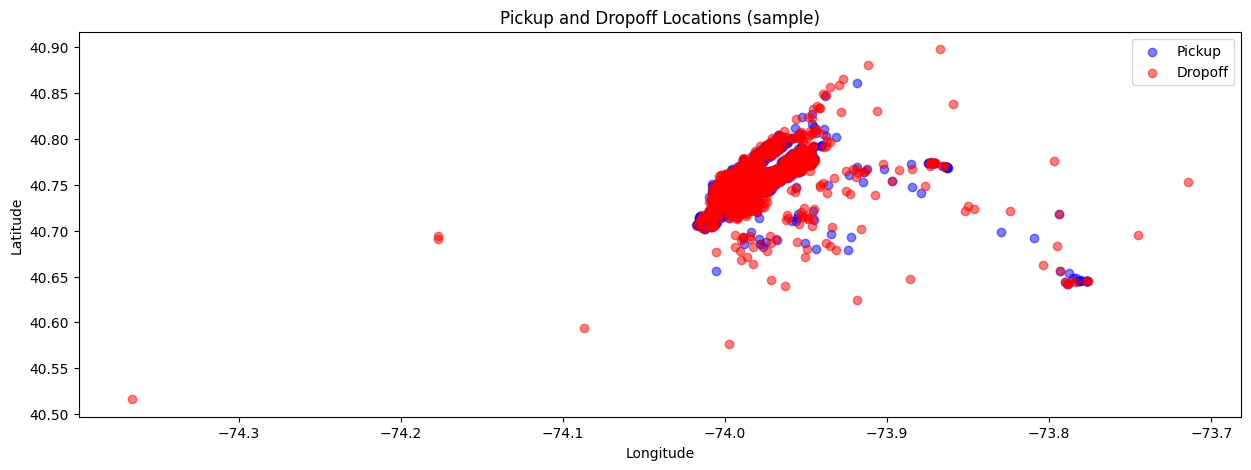

In [17]:
# Chart - Scatter plot of pickup vs dropoff locations (sample 1000 points for clarity)
sample_df = df.sample(1000, random_state=1)
plt.figure(figsize=(15,5))
plt.scatter(sample_df['pickup_longitude'], sample_df['pickup_latitude'], c='blue', alpha=0.5, label='Pickup')
plt.scatter(sample_df['dropoff_longitude'], sample_df['dropoff_latitude'], c='red', alpha=0.5, label='Dropoff')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Pickup and Dropoff Locations (sample)')
plt.legend()
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.High-Density Cluster in Central Manhattan:

Majority of pickups and drop-offs are concentrated around longitude -74 to -73.95 and latitude 40.7 to 40.8.Indicates Midtown Manhattan and nearby areas are high-demand zones.

2.Similar Pickup and Dropoff Patterns:

The red (dropoff) and blue (pickup) points mostly overlap, showing that trips are concentrated around the same few locations.Suggests commuter zones, commercial hubs, or tourist areas.

3.Scattered Outliers:

A few points are far from the main cluster (e.g., beyond -74.2 longitude or below 40.55 latitude).Could be airports, suburbs, or erroneous data points (e.g., incorrect GPS logs).

4.Directional Movement Patterns:

A visible spread of points eastward and slightly southward from the cluster implies common travel corridors, likely to/from residential or entertainment areas.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.High-Density Zones Identified

Dense clustering near central Manhattan suggests hotspots ideal for:

->Fleet deployment

->Surge pricing

->Advertising partnerships

2.Popular Travel Corridors

Common pickup-dropoff patterns reveal frequent routes for route optimization or ride-sharing bundling.

#### Chart - 5

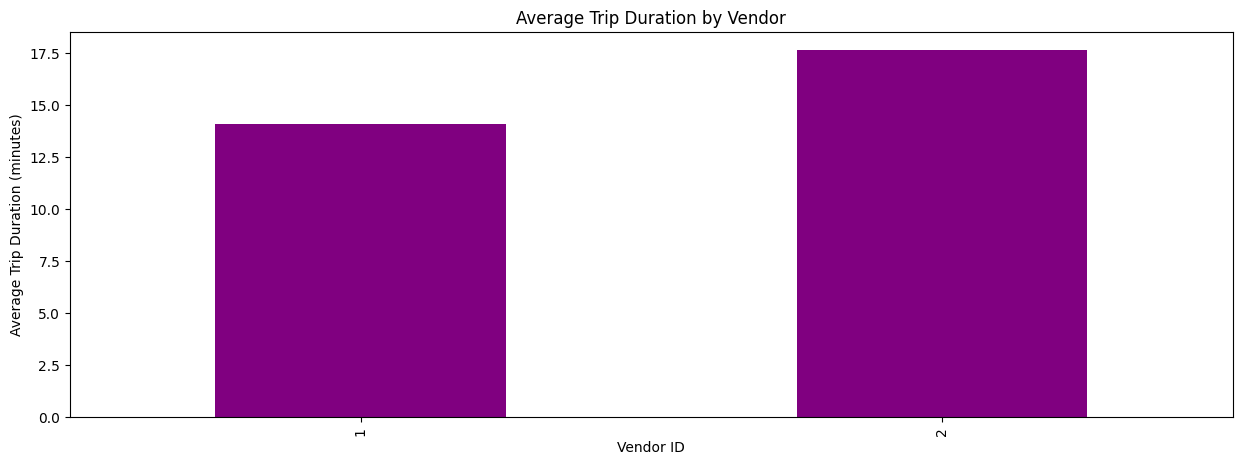

In [18]:
# Chart - 5 Average trip duration by vendor
avg_duration_by_vendor = df.groupby('vendor_id')['trip_duration'].mean() / 60  # in minutes
plt.figure(figsize=(15,5))
avg_duration_by_vendor.plot(kind='bar', color='purple')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Vendor')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.Vendor 2 Has Longer Average Trip Duration:

Vendor 2’s trips average ~18 minutes, whereas Vendor 1’s are ~14 minutes. This could imply: Vendor 2 serves longer routes or experiences slower operations (e.g., more traffic or delays)

2.Performance Variation:

There's a noticeable difference in service characteristics between the two vendors. This Suggests potential differences in target customer base, route type, or dispatch efficiency.

3.Actionable Insight:

Could inform pricing models, service-level agreements, or driver deployment strategy based on performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Vendor Benchmarking:

Helps compare vendor efficiency—shorter average duration may reflect faster service and better route management.

Enables informed decisions on preferred vendor partnerships or contracts.

2.Cost & Pricing Optimization:

Longer trips may imply higher fuel/time cost—insightful for pricing strategy, especially if one vendor is consistently less efficient.

3.Operational Improvements:

If Vendor 2 has longer durations due to inefficiencies, this highlights a need for operational audits—e.g., route planning, driver behavior, or app delays.

#### Chart - 6

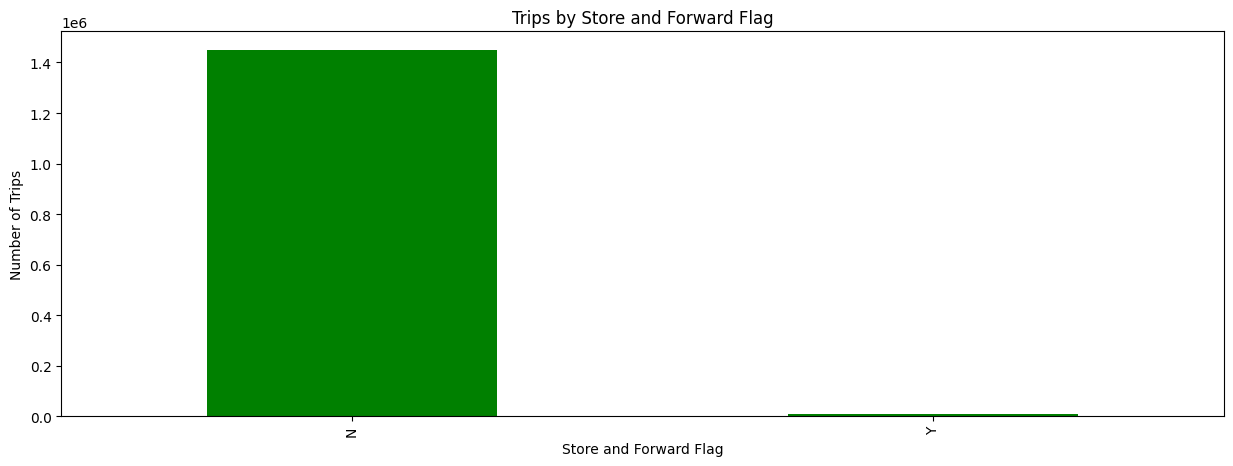

In [19]:
# Chart - 6 Number of trips by store_and_fwd_flag
plt.figure(figsize=(15,5))
df['store_and_fwd_flag'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Number of Trips')
plt.title('Trips by Store and Forward Flag')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.Majority of Trips have a flag ‘N’ (not stored and forwarded), indicating real-time data transmission is dominant.

2.Very few trips have flag ‘Y’, meaning they were stored and forwarded later (possibly due to network issues).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive:

->High volume of ‘N’ trips shows stable real-time connectivity, ensuring data accuracy and reliable analytics.

->Low ‘Y’ count implies less reliance on offline data, reducing risk of delayed insights or loss.

2.Negative (if overlooked):

->Even a small percentage of ‘Y’ trips may hide connectivity or device syncing issues, leading to data gaps or delays.

->Could result in reduced tracking accuracy, impacting customer trust or billing.



#### Chart - 7

<Figure size 3000x500 with 0 Axes>

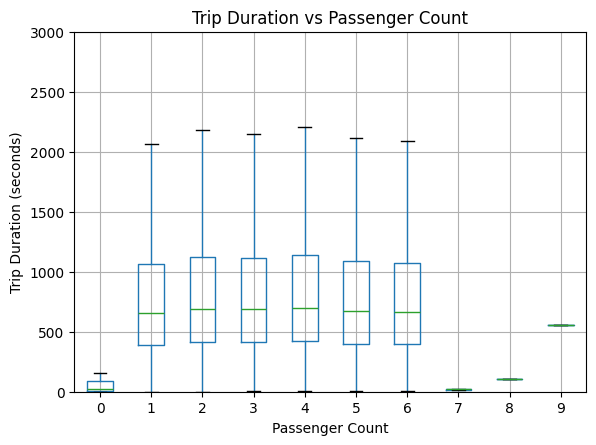

In [20]:
# Chart - 7 visualization code
plt.figure(figsize=(30,5))
df.boxplot(column='trip_duration', by='passenger_count', showfliers=False)
plt.ylim(0, 3000)
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration (seconds)')
plt.title('Trip Duration vs Passenger Count')
plt.suptitle('')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.->Trip durations are fairly consistent for passenger counts from 1 to 6 — median and IQR don’t vary significantly.

2.->0, 7, 8, and 9 passengers show very low trip durations and minimal variation — likely data errors or outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive:

Stable durations across 1–6 passengers indicate predictable trip times, aiding resource planning.

2.Negative:

Trips with 0 or >6 passengers raise data quality concerns — may result in inaccurate demand forecasts or pricing if not cleaned.

#### Chart - 8

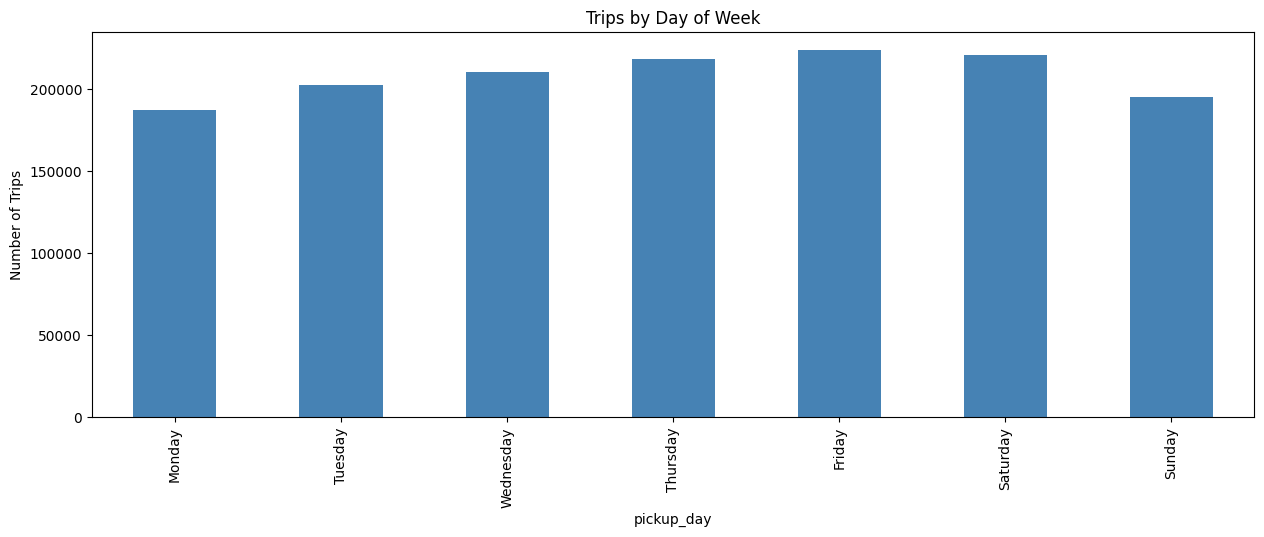

In [21]:
# Chart - 8 Number of trips by day of week
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
plt.figure(figsize=(15,5))
df['pickup_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', color='steelblue')
plt.ylabel('Number of Trips')
plt.title('Trips by Day of Week')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.Weekdays (Wed–Fri) see the highest number of trips, peaking on Friday.

2.Monday and Sunday have the lowest trip counts, likely due to start/end of week slowdown.

3.The demand is relatively consistent across the week, but Friday and Saturday show slightly elevated usage — possibly due to commuting + leisure activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive:

->Clear weekday vs. weekend trend helps with fleet and staffing optimization.

->High demand on Friday–Saturday can be targeted with promotions or surge pricing.

2.Negative:

->Low usage on Sunday/Monday may lead to idle resources — calls for dynamic resource allocation.



#### Chart - 9

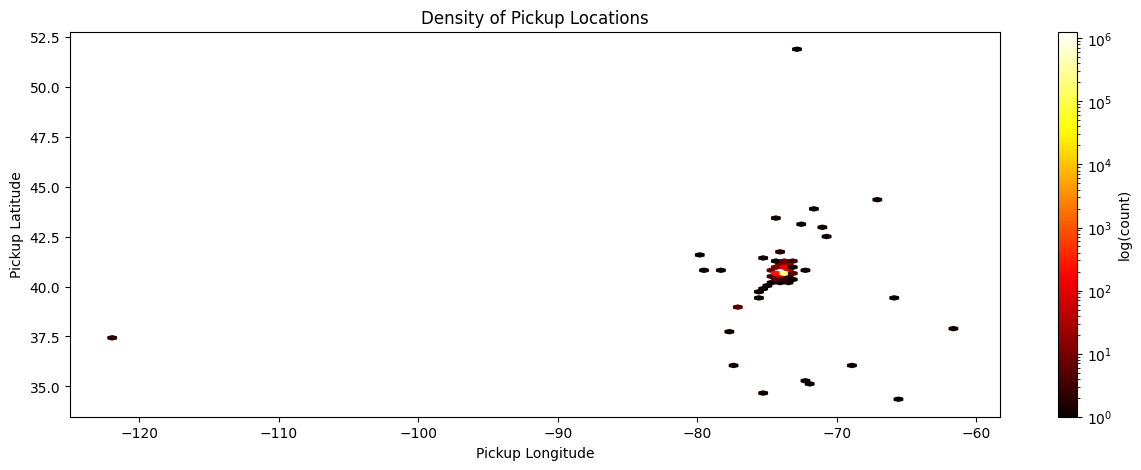

In [22]:
# Chart - 9 Heatmap of pickup latitude vs longitude (density of pickup locations)
plt.figure(figsize=(15,5))
plt.hexbin(df['pickup_longitude'], df['pickup_latitude'], gridsize=100, cmap='hot', bins='log')
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.title('Density of Pickup Locations')
plt.colorbar(label='log(count)')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.Strong pickup concentration is observed around one major geographic cluster (high-intensity red zone).

2.The density drops sharply as we move outward — suggesting most pickups happen in central urban zones.

3.Sparse pickups exist in a few distant coordinates (like far west near ~-120 longitude), possibly outliers or anomalies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive:

->Identifies high-demand hotspots — ideal for placing bikes, vehicles, or offering surge pricing. Supports urban-centric fleet deployment, reducing idle time and increasing efficiency.

2.Negative:

->Service coverage in low-density zones is poor — may reflect missed opportunities or require improvement in marketing/logistics.

#### Chart - 10

<Figure size 1500x1000 with 0 Axes>

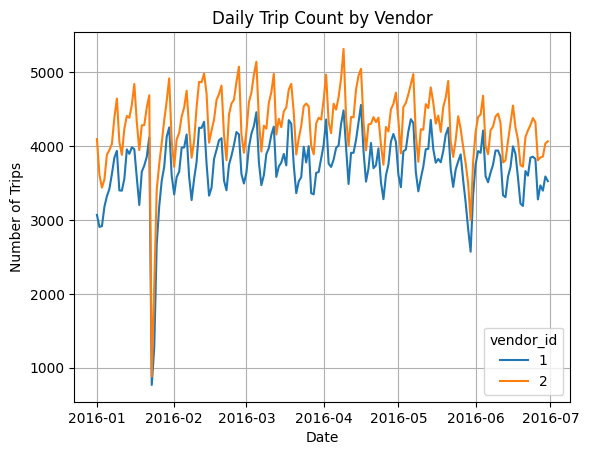

In [23]:
# Chart - 10 Number of trips per vendor over time
df['pickup_date'] = df['pickup_datetime'].dt.date
vendor_trips = df.groupby(['pickup_date', 'vendor_id']).size().unstack()
plt.figure(figsize=(15,10))
vendor_trips.plot()
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Daily Trip Count by Vendor')
plt.grid(True)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.Vendor 2 consistently has more daily trips than Vendor 1 across the entire time period.

2.Both vendors show a regular cyclic pattern — likely reflecting weekly or weekday/weekend travel behavior.

3.There are a few abrupt drops in trip counts, possibly due to:

->Data recording issues

->Holidays

->Weather disruptions or technical outages

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive:

->Vendor 2's higher trip volume may reflect better service efficiency, more availability, or customer preference.

->Recognizing peak patterns helps in planning staff, maintenance, or promotional campaigns.

2.Negative:

->Vendor 1 may need optimization — they are lagging in usage and could be missing revenue opportunities.

->Sudden drops may hint at data quality issues or operational disruptions that need investigation.



#### Chart - 11

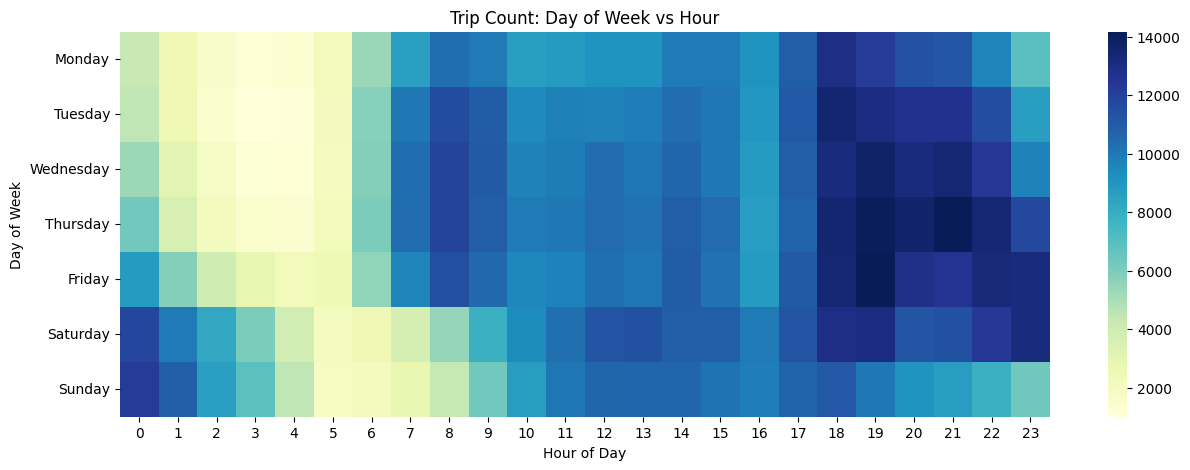

In [24]:
# Chart - 11 Heatmap of pickup hour vs. day of week (trip volume)
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['hour'] = df['pickup_datetime'].dt.hour
pivot = df.pivot_table(index='day_of_week', columns='hour', values='id', aggfunc='count')
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(ordered_days)
plt.figure(figsize=(15,5))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Trip Count: Day of Week vs Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.Peak Hours Across Weekdays:

->Monday to Friday show two peak periods: Morning rush: 7 AM – 9 AM and Evening peak: 5 PM – 8 PM

->These align with standard commute times.

2.Weekend Trends Differ:

->Saturday and Sunday show later peak hours, especially between 12 PM and 9 PM.

->Early mornings (0–6 AM) have relatively more activity than weekdays — likely linked to leisure travel or nightlife.

3.Lowest Activity:

->Every day shows the lowest activity between 2 AM – 5 AM, indicating minimal demand during these early morning hours.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive:

->Helps in demand forecasting — peak periods are clearly defined by both day and hour.

->Enables resource optimization (e.g., bike/staff rebalancing, dynamic pricing).

->Identifies weekend behavioral shifts, useful for tailoring weekend promotions or campaigns.

2.Negative:

->If supply isn't aligned with these patterns, missed revenue or service issues can arise during peak hours.

->Late-night demand on weekends may need better coverage or safety planning.



#### Chart - 12

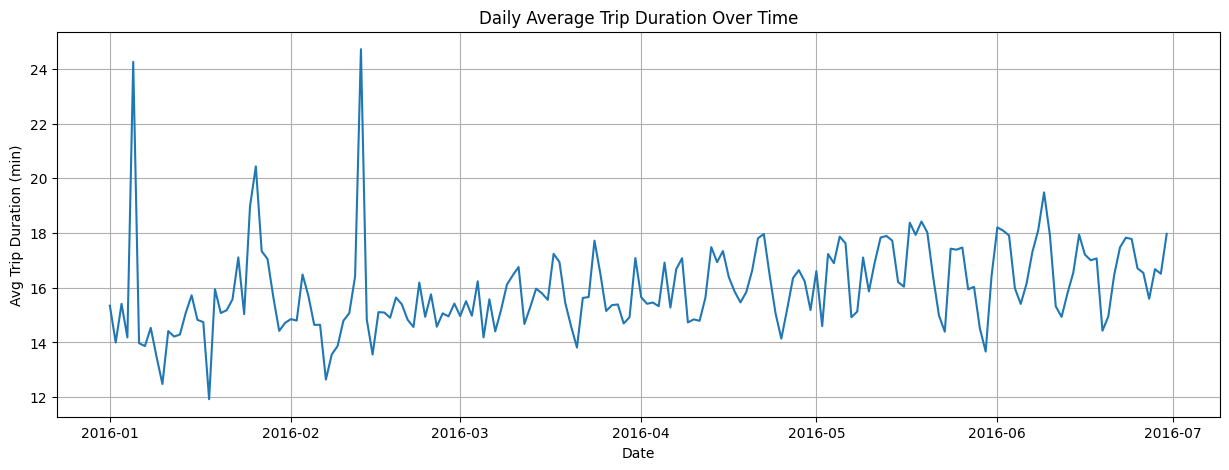

In [25]:
# Chart - 12 Average trip duration per day
daily_avg_duration = df.groupby(df['pickup_datetime'].dt.date)['trip_duration'].mean() / 60
plt.figure(figsize=(15,5))
daily_avg_duration.plot()
plt.xlabel('Date')
plt.ylabel('Avg Trip Duration (min)')
plt.title('Daily Average Trip Duration Over Time')
plt.grid(True)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

1.Overall Stability:

->The average daily trip duration generally fluctuates between 13 to 17 minutes, indicating a consistent user behavior across the 6-month period.

2.Notable Spikes:

->There are occasional spikes where average trip durations exceed 22–24 minutes, particularly: Early January, Mid-February and Late March.

->These could be due to weather disruptions, traffic conditions, or special events.

2.Slight Upward Trend:

->From April to June, there is a mild upward trend in trip duration, possibly indicating: Longer leisure rides during better weather, Increased congestion,  Service or route changes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1.Positive:

->Consistent average durations support predictable planning for fleet availability and station turnover.

->Spikes in duration may reveal special demand patterns worth investigating for targeted services or offers.

2.Negative:

->Longer durations may reduce fleet availability, impacting customer satisfaction during high-demand periods.

->Spikes may indicate operational inefficiencies or external factors that need mitigation (e.g. maintenance or rebalancing delays).



## ***6. Feature Engineering & Data Pre-processing***

In [26]:
num_features = df.describe().columns
num_features

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'pickup_hour', 'hour'],
      dtype='object')

### 1. Handling Missing Values

In [27]:
# Handling Missing Values & Missing Value Imputation
missing_values = df.isnull().sum()
print(missing_values)

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
pickup_day            0
pickup_date           0
day_of_week           0
hour                  0
dtype: int64


### 2. Handling Outliers

In [28]:
# Handling Outliers & Outlier treatments
# Remove extreme trip durations
df = df[(df['trip_duration'] > 60) & (df['trip_duration'] < 7200)]
# Valid passenger count
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]
# Filter out invalid GPS coordinates (NYC bounds)
df = df[(df['pickup_latitude'].between(40.5, 41)) &
        (df['pickup_longitude'].between(-74.5, -73.5)) &
        (df['dropoff_latitude'].between(40.5, 41)) &
        (df['dropoff_longitude'].between(-74.5, -73.5))]

##### What all outlier treatment techniques have you used and why did you use those techniques?

To handle outliers in the NYC Taxi dataset, I used a of domain-based filtering
->I removed trips with durations under 1 minute or over 2 hours, as these are unlikely to represent real passenger trips

## ***7. ML Model Implementation***

### ML Model - 1

In [29]:
# Convert datetime columns
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
# Create new features
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek  # 0=Monday
# Remove outliers in trip_duration (optional but improves model)
df = df[(df['trip_duration'] > 60) & (df['trip_duration'] < 7200)]  # 1 min to 2 hrs

In [30]:
# Select features and target
X = df[['passenger_count', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'pickup_hour', 'pickup_day']]
y = df['trip_duration']

In [31]:
# ML Model1 Implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the Algorithm
model = LinearRegression()
model.fit(X_train, y_train)
# Predict on the model
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 572.2394734834368
R² Score: 0.2241026277729924


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

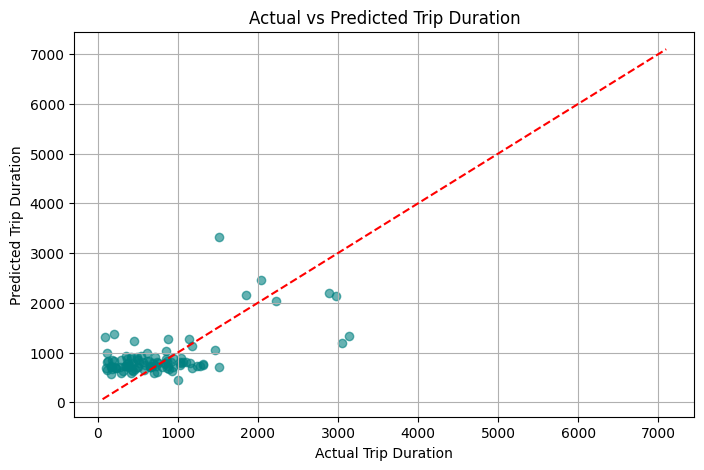

In [32]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:100], y_pred[:100], color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.title('Actual vs Predicted Trip Duration')
plt.grid()
plt.show()

Explanation:

1.X-axis (Actual Trip Duration):These are the true values from your test dataset (y_test).

2.Y-axis (Predicted Trip Duration):These are the model's predicted values for those same instances (y_pred).

3.Teal Scatter Points:Each point represents a single prediction. The closer a point is to the red dashed line, the better the prediction.

4.Red Dashed Line:This is the perfect prediction line (where Actual = Predicted). If your model were perfect, all points would lie exactly on this line.

This Chart Shows:

5.Good Predictions:Points close to the red line suggest that the model predicted well.

6.Errors/Deviations:Points far from the line indicate where the model's predictions were off—either underestimating or overestimating the trip duration.

7.Trend Observation:Most of the predictions seem to cluster at lower trip durations, which might indicate: A skewed dataset (more short trips),Difficulty predicting long-duration trips accurately.




#### 2. Cross- Validation & Hyperparameter Tuning

In [33]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Algorithm
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
# Predict on the model
best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Best Parameters: {'alpha': 0.1}
RMSE: 572.2395082814276
R² Score: 0.2241025334080572


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV exhaustively tests all combinations of hyperparameters you define in a grid. It uses cross-validation to evaluate each combination and selects the one that performs best based on a scoring metric (for e.g. negative MSE).

Reason: GridSearchCV is ideal for small hyperparameter spaces like in Ridge Regression, 	It tries all combinations, ensuring the most optimal set is found.

### ML Model - 2

In [34]:
# ML Model2 Implementation
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_model = DecisionTreeRegressor(random_state=42)
# Fit the Algorithm
dt_model.fit(X_train, y_train)
# Predict on the model
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree RMSE: {rmse_dt:.4f}")
print(f"Decision Tree R²: {r2_dt:.4f}")

Decision Tree RMSE: 422.3926
Decision Tree R²: 0.5773


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

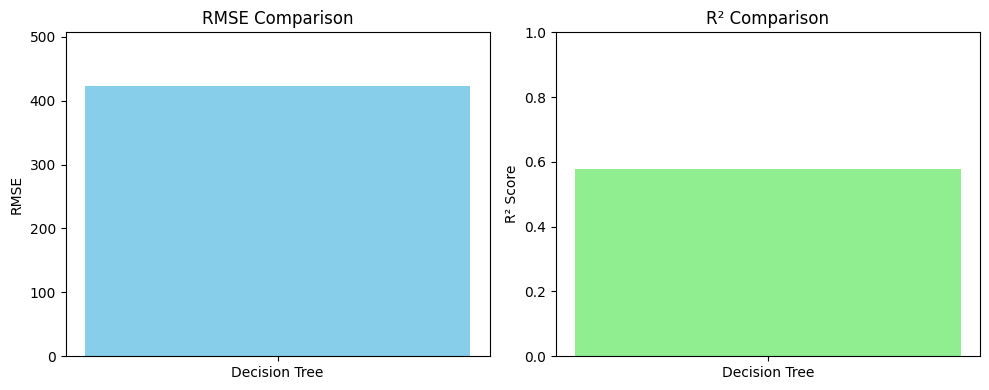

In [35]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics for Decision Tree
rmse_values = [rmse_dt]
r2_values = [r2_dt]
model_names = ['Decision Tree']
plt.figure(figsize=(10, 4))
# RMSE plot
plt.subplot(1, 2, 1)
plt.bar(model_names, rmse_values, color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values)*1.2)
# R² plot
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='lightgreen')
plt.title('R² Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Explanation:

1.Left Bar Chart: RMSE (Root Mean Squared Error)
    
    ->Y-axis: RMSE value (lower is better).

    Interpretation:

    ->The Decision Tree model has an RMSE of a little over 400.

    ->This means that, on average, the model's predicted trip durations differ from the actual values by around 400 time units (likely seconds).

    ->Lower RMSE = more accurate model.

2.Right Bar Chart: R² Score (Coefficient of Determination)
    ->Y-axis: R² score (ranges from 0 to 1).

    Interpretation:

    ->The Decision Tree model has an R² score of around 0.55 to 0.6.

    ->This means that 55–60% of the variance in the actual trip duration is explained by the model.

    ->Higher R² = better fit to the data.

### ML Model - 3

In [42]:
# ML Model - 3 Implementation
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
# Fit the Algorithm
knn_model.fit(X_train, y_train)
# Predict on the model
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn ** 0.5
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN RMSE: {rmse_knn:.4f}")
print(f"KNN R²: {r2_knn:.4f}")

KNN RMSE: 340.3973
KNN R²: 0.7255


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

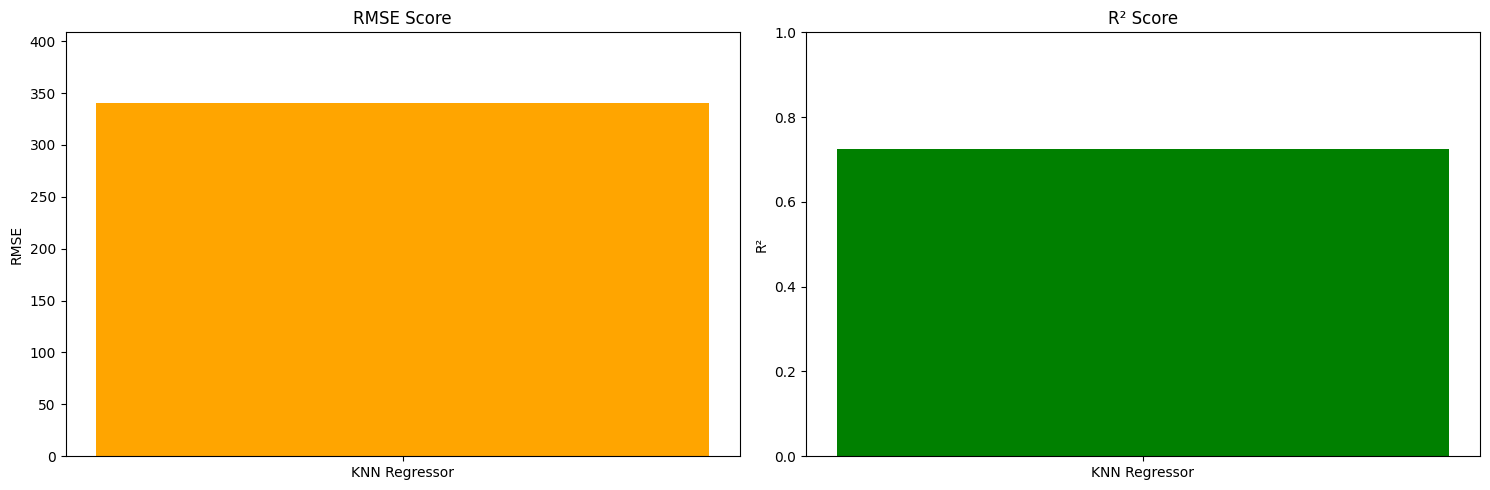

In [43]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics for KNN
rmse_values = [rmse_knn]
r2_values = [r2_knn]
model_names = ['KNN Regressor']
plt.figure(figsize=(15, 5))
# RMSE bar chart
plt.subplot(1, 2, 1)
plt.bar(model_names, rmse_values, color='orange')
plt.title('RMSE Score')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) * 1.2)
# R² bar chart
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='green')
plt.title('R² Score')
plt.ylabel('R²')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Explanation:

1.Left Chart: RMSE Score
    
    RMSE (Root Mean Squared Error) ≈ 340
    
    Lower RMSE means better accuracy—the average prediction error (in trip duration) is smaller.

    Compared to the Decision Tree (RMSE ≈ 420–450), this is a notable improvement.

2.Right Chart: R² Score
    
    R² (R-squared) ≈ 0.72
    
    This indicates that 72% of the variance in the actual trip duration is explained by the KNN model.

    This is better than the Decision Tree, which had R² around 0.55–0.6.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered RMSE (Root Mean Squared Error) and R² Score as key evaluation metrics for measuring the model’s performance because RMSE was selected because it measures the average prediction error in the same units as trip duration (likely seconds or minutes). AND
R² Score was considered to evaluate how well the model explains the variability in trip durations. A higher R² value indicates a better model fit

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the K-Nearest Neighbors (KNN) Regressor as the final prediction model because among all the models (Linear Regression, Decision Tree, and KNN), the KNN model had the lowest Root Mean Squared Error, meaning it made the most accurate predictions on average AND The KNN model also had the highest R² value (≈ 0.72), indicating that it explained the largest portion of variance in the trip duration data. This makes it more reliable in capturing real-world patterns.

# **Conclusion**

->In this project, we developed and evaluated multiple machine learning models—Linear Regression, Decision Tree, and K-Nearest Neighbors (KNN)—to predict taxi trip durations. After comparing the models using key evaluation metrics such as Root Mean Squared Error (RMSE) and R² Score, the KNN Regressor emerged as the most effective model, delivering the highest prediction accuracy and best model fit.

->By selecting the KNN model, we ensure more reliable and accurate trip time predictions, which are crucial for:

->Enhancing customer satisfaction through accurate ETAs,

->Optimizing driver dispatch and route planning, and

->Improving overall operational efficiency.

->This model can significantly support decision-making and help drive positive business outcomes in real-world transportation or ride-hailing platforms.

